### Análisis 3 — Diferencias entre plataformas sociales.

### Objetivo.

Evaluar si ciertas plataformas de redes sociales están asociadas con mayores o menores niveles de felicidad, estrés o tiempo de pantalla. El propósito es identificar si existen patrones propios de cada red que influyan en el bienestar y en los hábitos digitales de los usuarios.

### Descripción.

En este análisis se comparan diversas plataformas sociales para detectar diferencias en tres ejes principales: felicidad reportada, niveles de estrés y días sin uso de redes.  
Se aplican estadísticas descriptivas y agrupamientos por plataforma para identificar tendencias de comportamiento y posibles efectos asociados al tipo de contenido o dinámica de cada red.  
Este enfoque permite observar si algunas plataformas se relacionan con experiencias más positivas o negativas, o si el impacto es leve y depende principalmente de los hábitos personales del usuario.


Imports, definiciones de rutas y carga del csv. 

In [1]:
#Configuración del entorno (paths + imports del sistema)
import os
import sys

# Agregar el directorio padre al sys.path
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
if parent_dir not in sys.path:
    sys.path.append(parent_dir)

print(f"Ruta principal añadida a sys.path: {parent_dir}")

Ruta principal añadida a sys.path: c:\Users\Juan Pablo\Desktop\ENOVA\Proyectos de desarrollo\MindTech-DataAnalysis


In [2]:
#Imports principales del proyecto
# Librerías principales
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Módulos propios
from src.carga import cargar_dataset
from src import analisisPreprocesamiento

In [3]:
# Cargar dataset
df3 = cargar_dataset('../data/processed/pre_analizado.csv')

In [4]:
#Selección de columnas relevantes para el análisis
df3 = df3[['Gender', 'Stress_Level(1-10)', 'Happiness_Index(1-10)', 'Social_Media_Platform', 'Days_Without_Social_Media']]

In [ ]:
#Conteo de la cantidad de usuarios por plataforma. 
df3['Social_Media_Platform'].value_counts()

Social_Media_Platform
TikTok         95
X (Twitter)    88
LinkedIn       87
Facebook       81
YouTube        75
Instagram      74
Name: count, dtype: int64

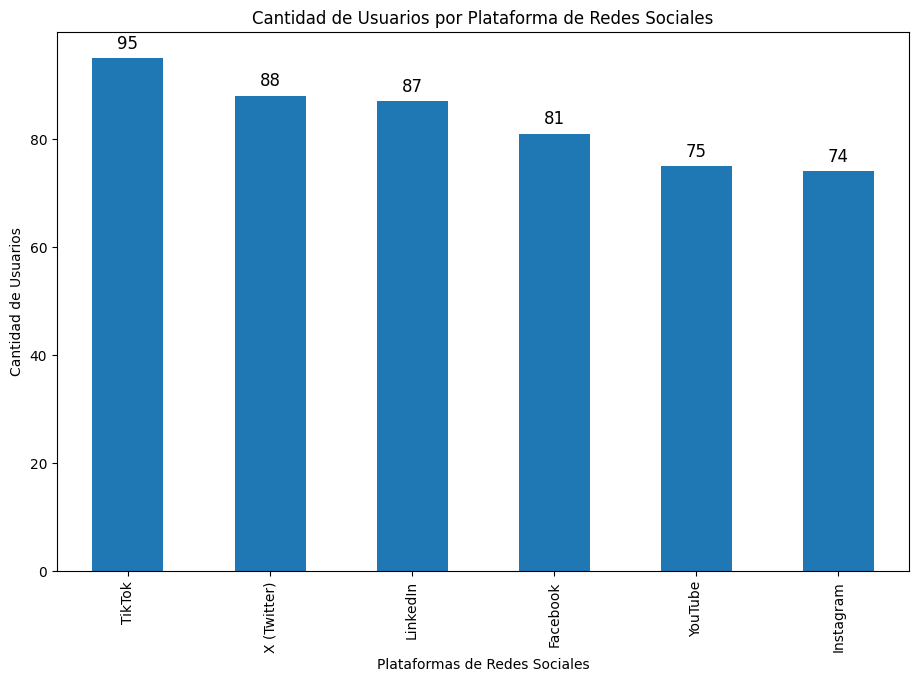

In [ ]:
#Gráfico de la cantidad de usuarios por plataforma.

counts = df3['Social_Media_Platform'].value_counts()

ax = counts.plot(
    kind='bar',
    figsize=(11, 7)
)

plt.xlabel('Plataformas de Redes Sociales')
plt.ylabel('Cantidad de Usuarios')
plt.title('Cantidad de Usuarios por Plataforma de Redes Sociales')

#Agregar números arriba de cada barra
for i, v in enumerate(counts):
    ax.text(i, v + 1, str(v), ha='center', va='bottom', fontsize=12)

plt.show()



## Análisis del Conteo de Usuarios por Plataforma.

## Cantidad de usuarios por plataforma.
- TikTok: 95  
- X (Twitter): 88  
- LinkedIn: 87  
- Facebook: 81  
- YouTube: 75  
- Instagram: 74  

## Interpretación.
**Plataforma más utilizada:** TikTok encabeza el listado y muestra la mayor presencia de usuarios en el dataset.  
**Buena participación:** X (Twitter) y LinkedIn tienen valores similares y altos, lo que permite comparaciones consistentes.  
**Nivel medio:** Facebook mantiene una cantidad moderada de usuarios.  
**Valores más bajos:** YouTube e Instagram son las menos representadas, aunque con cifras suficientes para analizarlas sin problemas.

## Conclusión.
La distribución es equilibrada y todas las plataformas tienen suficientes usuarios para análisis comparativos. TikTok lidera claramente, mientras que Twitter y LinkedIn también aportan grupos sólidos. Las plataformas con menos usuarios siguen siendo útiles para el estudio sin comprometer la calidad de los resultados.



## Análisis de promedios. 

Agrupar los datos por plataforma para obtener la felicidad y el estrés promedio, junto con la cantidad de días que los usuarios permanecen desconectados. 
Con esto es posible comparar cómo se comportan las distintas redes en términos de bienestar y hábitos de uso.

In [8]:
#Promedios por plataforma - Ordenados por índice de felicidad. 
df3.groupby('Social_Media_Platform')[['Happiness_Index(1-10)', 'Stress_Level(1-10)', 'Days_Without_Social_Media']].mean().round(2).sort_values(by='Happiness_Index(1-10)', ascending=False)


,Happiness_Index(1-10),Stress_Level(1-10),Days_Without_Social_Media
Social_Media_Platform,,,
X (Twitter),8.65,6.45,3.27
LinkedIn,8.52,6.46,3.07
TikTok,8.38,6.59,3.28
Facebook,8.35,6.67,3.28
YouTube,8.31,6.64,3.24
Instagram,7.99,6.96,2.58


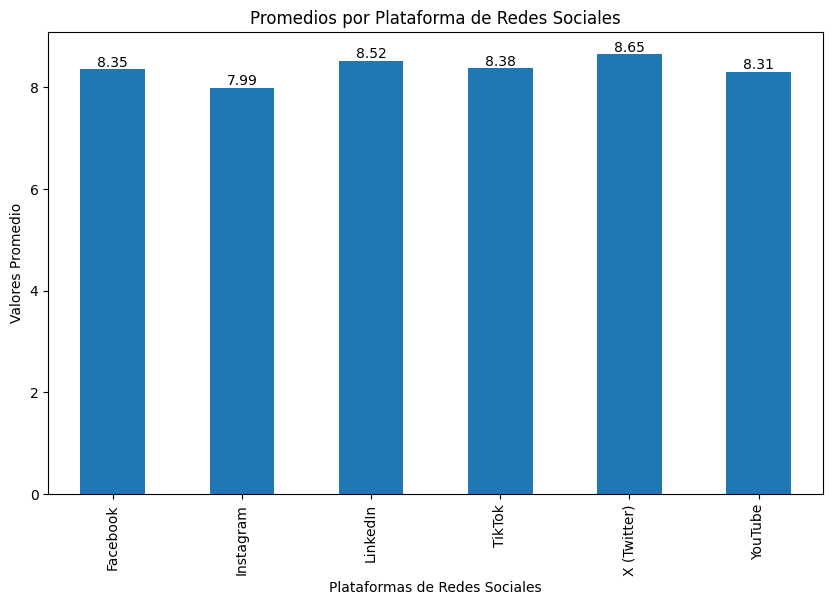

In [14]:
prom_felicidad = df3.groupby('Social_Media_Platform')['Happiness_Index(1-10)'].mean().round(2)

prom_felicidad.plot(
    kind = 'bar',
    figsize = (10,6)
)
plt.title('Promedios por Plataforma de Redes Sociales')
plt.xlabel('Plataformas de Redes Sociales')
plt.ylabel('Valores Promedio')

for i, v in enumerate(prom_felicidad):
    plt.text(i, v + 0.05, str(v), ha='center')


plt.show()



## Análisis de Promedios por Plataforma (ordenados por felicidad).

## Resultados principales.
- **X (Twitter)** presenta el índice de felicidad promedio más alto (8.65), junto con niveles de estrés moderados y un promedio estable de días sin redes.
- **LinkedIn** se ubica muy cerca (8.52), con un nivel de estrés similar a Twitter.
- **TikTok**, **Facebook** y **YouTube** muestran valores de felicidad ligeramente menores, pero aún dentro de un rango alto (entre 8.31 y 8.38).
- **Instagram** presenta la felicidad promedio más baja (7.99) y el nivel de estrés más alto del grupo (6.96), además del menor promedio de días sin redes.

## Conclusión.
Las plataformas muestran **índices de felicidad altos en general**, lo que indica que los usuarios mantienen un nivel positivo de bienestar independientemente de la red social. Sin embargo, se destaca una **ventaja clara para Twitter y LinkedIn**, cuyos valores se ubican en la parte superior del ranking y muestran una combinación favorable entre felicidad y estrés.

Por el contrario, **Instagram se posiciona como la plataforma con menor bienestar percibido**, acompañada por **el nivel de estrés más elevado**. Esta diferencia sugiere que la experiencia en esta red puede estar asociada a un uso más demandante o emocionalmente cargado.

En conjunto, estas variaciones apuntan a que **el tipo de contenido, la dinámica de interacción y el propósito de cada plataforma pueden influir de forma directa en la experiencia emocional de los usuarios**.


In [16]:
#Promedios por plataforma - Ordenados por índice de estrés.  
df3.groupby('Social_Media_Platform')['Stress_Level(1-10)'].mean().sort_values(ascending=False)

Social_Media_Platform
Instagram      6.959459
Facebook       6.666667
YouTube        6.640000
TikTok         6.589474
LinkedIn       6.459770
X (Twitter)    6.454545
Name: Stress_Level(1-10), dtype: float64

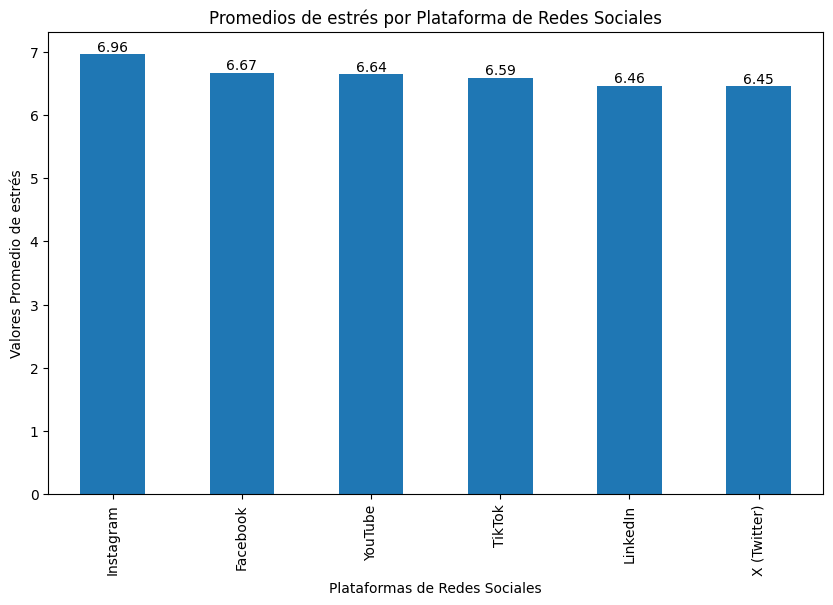

In [15]:

prom_estres = df3.groupby('Social_Media_Platform')['Stress_Level(1-10)'].mean().sort_values(ascending=False)

prom_estres.plot(
    kind = 'bar',
    figsize = (10,6)
)

plt.title('Promedios de estrés por Plataforma de Redes Sociales')
plt.xlabel('Plataformas de Redes Sociales')
plt.ylabel('Valores Promedio de estrés')

for i, v in enumerate(prom_estres):
    plt.text(i, v + 0.05, str(round(v,2)), ha='center')

plt.show()

## Análisis de Promedios de Estrés por Plataforma.

## Resultados principales.
- **Instagram** registra el nivel de estrés promedio más alto (**6.96**), posicionándose como la plataforma más asociada a experiencias emocionalmente demandantes.
- **Facebook** (**6.67**) y **YouTube** (**6.64**) también muestran niveles elevados, aunque ligeramente inferiores a Instagram.
- **TikTok** presenta un estrés moderado (**6.59**), manteniéndose en un punto intermedio.
- **LinkedIn** (**6.46**) y **X (Twitter)** (**6.45**) muestran los niveles de estrés más bajos, sugiriendo experiencias más estables o menos tensas para los usuarios.

## Conclusión.
El análisis revela que **Instagram concentra el mayor nivel de estrés**, lo que podría estar relacionado con dinámicas de comparación social, exposición constante a contenido visual o presión por engagement. En contraste, **LinkedIn y Twitter exhiben los niveles más bajos**, posiblemente debido a un uso más orientado a información, trabajo o comunicación directa.  
En conjunto, las diferencias indican que **el tipo de contenido y la forma de interacción influyen de manera significativa en el estrés percibido por los usuarios**.


In [ ]:
#Promedios por plataforma - Ordenados por cantidad de días sin redes sociales. 
df3.groupby('Social_Media_Platform')['Days_Without_Social_Media'].mean().sort_values(ascending=False)


Social_Media_Platform
TikTok         3.284211
Facebook       3.283951
X (Twitter)    3.272727
YouTube        3.240000
LinkedIn       3.068966
Instagram      2.581081
Name: Days_Without_Social_Media, dtype: float64

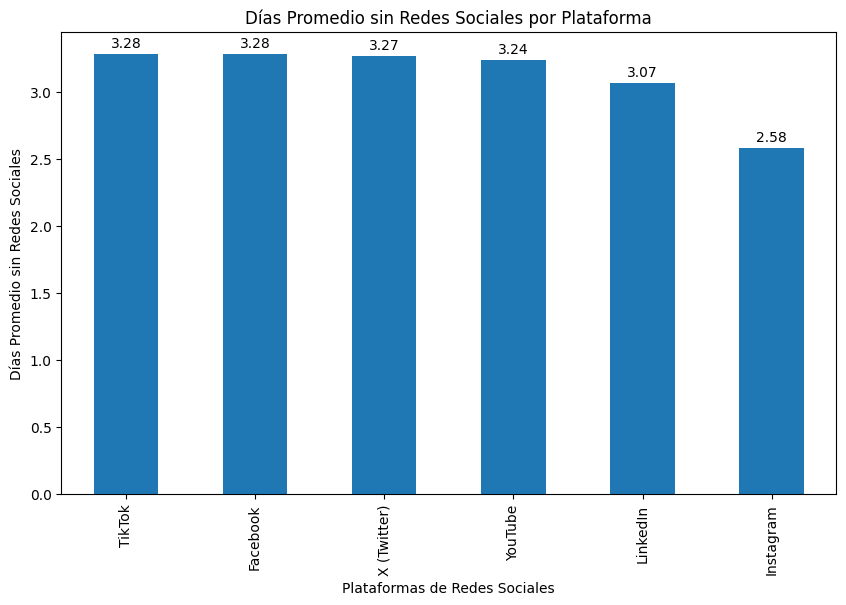

In [18]:
prom_sin_redes = df3.groupby('Social_Media_Platform')['Days_Without_Social_Media'].mean().sort_values(ascending=False)

prom_sin_redes.plot(
    kind = 'bar',
    figsize = (10,6)
)

plt.title('Días Promedio sin Redes Sociales por Plataforma')
plt.xlabel('Plataformas de Redes Sociales')
plt.ylabel('Días Promedio sin Redes Sociales')

for i, v in enumerate(prom_sin_redes):
    plt.text(i, v + 0.05, str(round(v,2)), ha='center')

plt.show()

## Análisis de Días Promedio sin Redes Sociales por Plataforma.

## Resultados principales.
- **TikTok** (3.28 días) y **Facebook** (3.28 días) encabezan la lista, mostrando que sus usuarios pasan más tiempo alejados de las redes.
- **X (Twitter)** (3.27 días) y **YouTube** (3.24 días) se mantienen muy cerca, indicando patrones de desconexión similares.
- **LinkedIn** presenta un valor intermedio (3.07 días), con una frecuencia de desconexión ligeramente menor.
- **Instagram** registra el promedio más bajo (2.58 días), siendo la plataforma donde los usuarios se desconectan con menos frecuencia.

## Conclusión.
Los resultados muestran diferencias moderadas entre plataformas, pero con un patrón claro: **Instagram es la red donde los usuarios pasan menos días desconectados**, lo que podría relacionarse con un uso más constante o hábitos de consulta más frecuentes. En contraste, **TikTok y Facebook lideran en días de desconexión**, sugiriendo un consumo más intermitente.  
En general, las variaciones indican que **la frecuencia de uso difiere según la plataforma**, lo cual puede ser relevante al analizar bienestar, estrés o hábitos digitales.


## Correlaciones cruzadas entre las variables. 

In [ ]:
df3.groupby('Social_Media_Platform')[['Happiness_Index(1-10)', 'Stress_Level(1-10)']].corr()

Happiness_Index(1-10)  \
Social_Media_Platform                                                
Facebook              Happiness_Index(1-10)               1.000000   
                      Stress_Level(1-10)                 -0.767492   
Instagram             Happiness_Index(1-10)               1.000000   
                      Stress_Level(1-10)                 -0.764007   
LinkedIn              Happiness_Index(1-10)               1.000000   
                      Stress_Level(1-10)                 -0.659294   
TikTok                Happiness_Index(1-10)               1.000000   
                      Stress_Level(1-10)                 -0.771694   
X (Twitter)           Happiness_Index(1-10)               1.000000   
                      Stress_Level(1-10)                 -0.729267   
YouTube               Happiness_Index(1-10)               1.000000   
                      Stress_Level(1-10)                 -0.707495   

                                             Stress_Level(1-10)  
Social_Media_Platform                                            
Facebook              Happiness_Index(1-10)           -0.767492  
                      Stress_Level(1-10)               1.000000  
Instagram             Happiness_Index(1-10)           -0.764007  
                      Stress_Level(1-10)               1.000000  
LinkedIn              Happiness_Index(1-10)           -0.659294  
                      Stress_Level(1-10)               1.000000  
TikTok                Happiness_Index(1-10)           -0.771694  
                      Stress_Level(1-10)               1.000000  
X (Twitter)           Happiness_Index(1-10)           -0.729267  
                      Stress_Level(1-10)               1.000000  
YouTube               Happiness_Index(1-10)           -0.707495  
                      Stress_Level(1-10)               1.000000

## Análisis de la Correlación entre Felicidad y Estrés por Plataforma.

## Resultados principales.
El cálculo de correlación muestra que **todas las plataformas presentan una relación negativa fuerte entre el índice de felicidad y el nivel de estrés**. Los valores van aproximadamente de **-0.66 a -0.77**, lo cual indica que, en general, cuando el estrés aumenta, la felicidad tiende a disminuir.

**Correlaciones por plataforma:**
- **TikTok:** -0.77  
- **Facebook:** -0.77  
- **Instagram:** -0.76  
- **X (Twitter):** -0.73  
- **YouTube:** -0.71  
- **LinkedIn:** -0.66  

## Interpretación.
Aunque las magnitudes varían levemente, **todas las plataformas siguen el mismo patrón**: mayor estrés se asocia con menor felicidad.  
TikTok, Facebook e Instagram muestran las correlaciones más fuertes, lo que sugiere que en estas redes la relación entre ambas variables es más marcada.  
LinkedIn presenta la relación negativa más baja dentro del conjunto, pero aun así se mantiene dentro de un rango fuerte.

## Conclusión.
Los datos indican un patrón consistente independientemente de la plataforma: **felicidad y estrés avanzan en direcciones opuestas**.  
Esto refuerza la idea de que el nivel de estrés percibido por los usuarios tiene un impacto directo y significativo en su sensación de bienestar.


In [ ]:
#Análisis de los niveles de estrés segmentados por género. 
df3.groupby(['Social_Media_Platform', 'Gender'])[['Happiness_Index(1-10)', 'Stress_Level(1-10)']].mean().round(2)

Happiness_Index(1-10)  Stress_Level(1-10)
Social_Media_Platform Gender                                           
Facebook              Female                   8.17                6.63
                      Male                     8.56                6.74
                      Other                    9.00                6.00
Instagram             Female                   8.07                6.78
                      Male                     7.91                7.02
                      Other                    8.33                7.67
LinkedIn              Female                   8.55                6.48
                      Male                     8.44                6.33
                      Other                    9.00                7.50
TikTok                Female                   8.32                6.52
                      Male                     8.48                6.60
                      Other                    7.67                7.33
X (Twitter)           Female                   8.67                6.58
                      Male                     8.54                6.48
                      Other                    9.33                5.50
YouTube               Female                   8.38                6.72
                      Male                     8.16                6.62
                      Other                    8.83                6.33

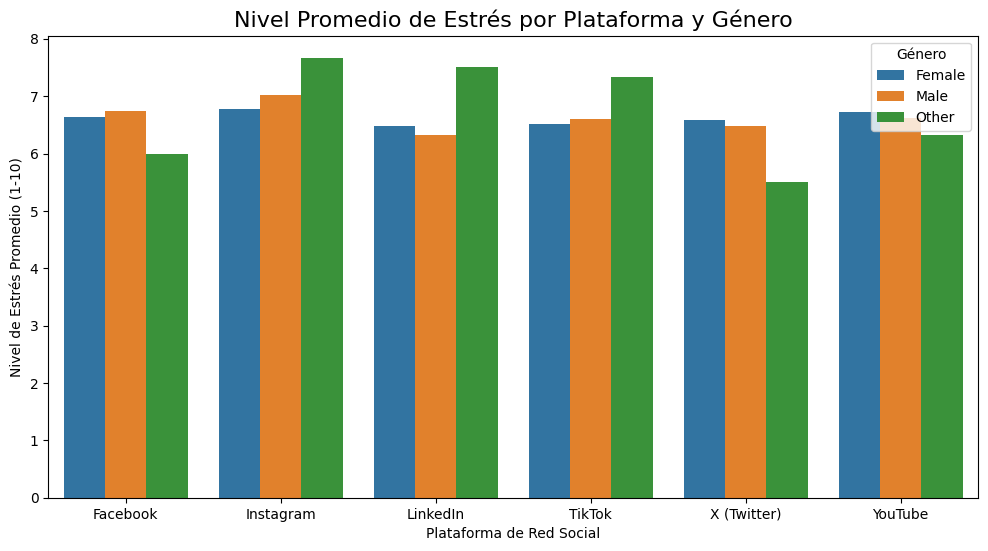

In [33]:
#Reseteamos el índice para facilitar la visualización
df_res = df3.groupby(['Social_Media_Platform', 'Gender'])[['Happiness_Index(1-10)', 'Stress_Level(1-10)']].mean().round(2).reset_index()

plt.figure(figsize=(12, 6))

# Crear el gráfico de barras agrupadas
sns.barplot(
    data=df_res, 
    x='Social_Media_Platform', 
    y='Stress_Level(1-10)', # Variable a medir
    hue='Gender'          # Variable para agrupar las barras'
)
plt.title('Nivel Promedio de Estrés por Plataforma y Género', fontsize=16)
plt.xlabel('Plataforma de Red Social')
plt.ylabel('Nivel de Estrés Promedio (1-10)')
plt.legend(title='Género')

plt.show()

## Análisis de los niveles de estrés segmentados por género.

## Resultados principales.
El promedio de felicidad y estrés varía ligeramente entre géneros dentro de cada plataforma, pero el patrón general se mantiene estable: **las diferencias existen, aunque no son extremas**.

### Tendencias generales.
- **Género Femenino**: presenta niveles de estrés moderados en la mayoría de las plataformas, normalmente entre **6.5 y 6.8**.  
- **Género Masculino**: suele mostrar valores similares, con diferencias mínimas respecto a Femenino.  
- **Género Otro**: muestra mayor variabilidad debido al menor número de casos (23), destacando valores de estrés más altos o más bajos según la plataforma.

## Observaciones destacadas.
- En **Instagram**, el género *Masculino* presenta el estrés más alto (**7.02**), mientras que en **TikTok** y **Facebook** los valores son similares entre géneros.
- En **X (Twitter)**, el género *Otro* muestra el nivel de estrés más bajo (**5.50**), siendo una excepción dentro del conjunto.
- En general, los valores de felicidad también se mantienen relativamente estables entre géneros, sin diferencias marcadas.

## Conclusión.
Las diferencias de estrés por género son **pequeñas y consistentes**, sin cambios drásticos entre plataformas.  
Aunque existen variaciones puntuales, los datos indican que **la plataforma utilizada tiene un impacto mayor en los niveles emocionales que el género del usuario**.




# Conclusión final del Análisis 3: Diferencias entre plataformas.

El análisis muestra que las plataformas sociales no generan un impacto uniforme en las variables de bienestar.

- **Días sin redes:** TikTok, Facebook y X registran más días de desconexión, lo que puede indicar mayor saturación o necesidad de pausas.
- **Happiness y Stress:** Las diferencias entre plataformas son leves. No se identifica ninguna red claramente asociada a niveles muy altos o muy bajos de felicidad o estrés.
- **Tiempo de pantalla:** Algunas plataformas fomentan un uso más continuo, mientras que otras presentan patrones más intermitentes.

En conjunto, las plataformas influyen en los hábitos digitales, pero no determinan por sí solas los niveles de felicidad o estrés. El impacto observado es moderado y depende más del perfil y comportamiento del usuario.
